## Getting Data Ready

In [1]:
import yfinance as yf

In [2]:
sp500 = yf.Ticker("^GSPC")

In [3]:
sp500_data = sp500.history(period="max")

In [4]:
sp500_data.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-10-01 00:00:00-04:00,6664.919922,6718.479980,6656.200195,6711.200195,6037950000,0.0,0.0
2025-10-02 00:00:00-04:00,6731.310059,6731.939941,6693.229980,6715.350098,5416130000,0.0,0.0
2025-10-03 00:00:00-04:00,6722.140137,6750.870117,6705.669922,6715.790039,5713110000,0.0,0.0
2025-10-06 00:00:00-04:00,6733.859863,6749.520020,6717.779785,6740.279785,5604460000,0.0,0.0
2025-10-07 00:00:00-04:00,6746.140137,6754.490234,6699.959961,6714.589844,5546150000,0.0,0.0


In [5]:
sp500_data.index.max()



Timestamp('2025-10-07 00:00:00-0400', tz='America/New_York')

## Data Cleaning & Visualizing 

In [6]:
sp500_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

<Axes: xlabel='Date'>

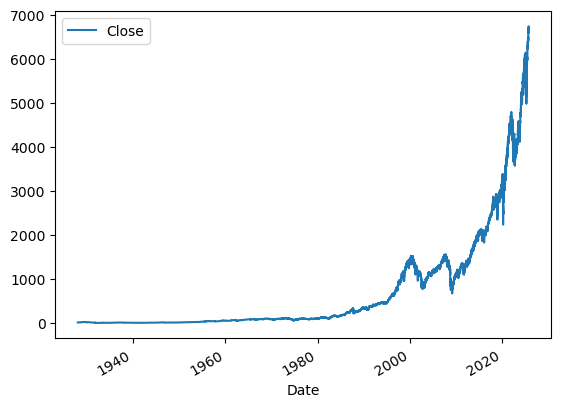

In [7]:
sp500_data.plot.line(y="Close", use_index=True)

In [8]:
del sp500_data['Dividends']
del sp500_data['Stock Splits']

In [9]:
sp500_data.head()

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0


## Setting Target For ML

In [10]:
# create a new column that holds tomorrow prices 

sp500_data['Tomorrow'] = sp500_data['Close'].shift(-1)

sp500_data.tail()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
2025-10-01 00:00:00-04:00,6664.919922,6718.479980,6656.200195,6711.200195,6037950000,6715.350098
2025-10-02 00:00:00-04:00,6731.310059,6731.939941,6693.229980,6715.350098,5416130000,6715.790039
2025-10-03 00:00:00-04:00,6722.140137,6750.870117,6705.669922,6715.790039,5713110000,6740.279785
2025-10-06 00:00:00-04:00,6733.859863,6749.520020,6717.779785,6740.279785,5604460000,6714.589844
2025-10-07 00:00:00-04:00,6746.140137,6754.490234,6699.959961,6714.589844,5546150000,NaN


In [11]:
#adding target variable

sp500_data['Target'] = (sp500_data['Tomorrow'] > sp500_data['Close'])

sp500_data['Target'].head()





Date
1927-12-30 00:00:00-05:00     True
1928-01-03 00:00:00-05:00    False
1928-01-04 00:00:00-05:00    False
1928-01-05 00:00:00-05:00     True
1928-01-06 00:00:00-05:00    False
Name: Target, dtype: bool

In [12]:
# converting bool to int

sp500_data['Target'] = sp500_data['Target'].astype(int)

sp500_data.tail()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2025-10-01 00:00:00-04:00,6664.919922,6718.479980,6656.200195,6711.200195,6037950000,6715.350098,1
2025-10-02 00:00:00-04:00,6731.310059,6731.939941,6693.229980,6715.350098,5416130000,6715.790039,1
2025-10-03 00:00:00-04:00,6722.140137,6750.870117,6705.669922,6715.790039,5713110000,6740.279785,1
2025-10-06 00:00:00-04:00,6733.859863,6749.520020,6717.779785,6740.279785,5604460000,6714.589844,0
2025-10-07 00:00:00-04:00,6746.140137,6754.490234,6699.959961,6714.589844,5546150000,NaN,0


In [13]:
#subsetting data to make it more manageable only using 1990 onwards

sp500_data = sp500_data[sp500_data.index >= '1990-01-01']

sp500_data.head()



,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0


In [14]:
sp500_data.count()



Open        9008
High        9008
Low         9008
Close       9008
Volume      9008
Tomorrow    9007
Target      9008
dtype: int64

## Model Training

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
#fitting the basic model

model = RandomForestClassifier(n_estimators=150, min_samples_split=100, random_state=1)
train = sp500_data.iloc[:-100]
test = sp500_data.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train['Target'])




RandomForestClassifier(min_samples_split=100, n_estimators=150, random_state=1)

In [19]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [20]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [ ]:
preds.head()



Date
2025-05-15 00:00:00-04:00    1
2025-05-16 00:00:00-04:00    1
2025-05-19 00:00:00-04:00    1
2025-05-20 00:00:00-04:00    1
2025-05-21 00:00:00-04:00    1
dtype: int32

In [22]:
precision_score(test['Target'], preds)

0.5384615384615384

<Axes: xlabel='Date'>

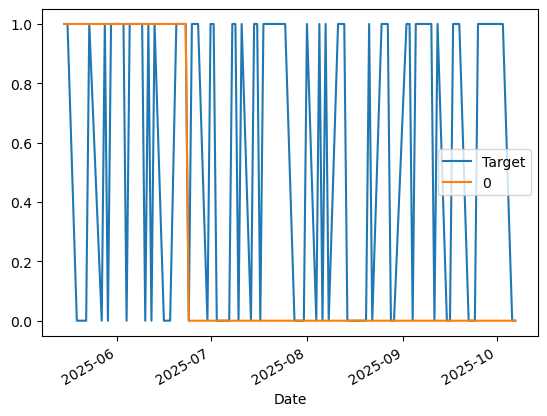

In [23]:
combined = pd.concat([test['Target'], preds], axis=1)

combined.plot()

## Backtesting System

In [24]:
#creating a predction function 

def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors]) 
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [25]:
# each trading year have 250 days of data
# we are traing on 2500 days (10 years)
# predict on 11th year 250 days then move so on

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i+step]
        test = data.iloc[i:(i+step)]
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [26]:
predictions = backtest(sp500_data, model, predictors)

In [27]:
predictions['Predictions'].value_counts()

Predictions
1    4261
0    2247
Name: count, dtype: int64

In [28]:
precision_score(predictions['Target'], predictions['Predictions'])

0.7146209809903779

## Adding Additional Predictors To Our Model

In [29]:
# we be looking at rolling mean for 2 days, a week, 3 months, last year and last 4 years
# then we will find ratio of today's close to the rolling mean

horizons = [2, 5, 60, 250, 1000]
new_predictors = []

for horizon in horizons:
    rolling_mean = sp500_data['Close'].rolling(horizon).mean()
    ratio_column = f'Close_Ratio_{horizon}'
    sp500_data[ratio_column] = sp500_data['Close'] / rolling_mean
    trend_column = f'Trend_{horizon}'
    sp500_data[trend_column] = sp500_data.shift(1).rolling(horizon).sum()['Target']

    new_predictors += [ratio_column, trend_column]

In [30]:
sp500_data.tail()


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
2025-10-01 00:00:00-04:00,6664.919922,6718.479980,6656.200195,6711.200195,6037950000,6715.350098,1,1.001697,2.0,1.007407,4.0,1.040695,35.0,1.118902,142.0,1.377531,531.0
2025-10-02 00:00:00-04:00,6731.310059,6731.939941,6693.229980,6715.350098,5416130000,6715.790039,1,1.000309,2.0,1.004693,5.0,1.040123,35.0,1.118844,142.0,1.377728,531.0
2025-10-03 00:00:00-04:00,6722.140137,6750.870117,6705.669922,6715.790039,5713110000,6740.279785,1,1.000033,2.0,1.002596,5.0,1.039023,35.0,1.118160,143.0,1.377161,532.0
2025-10-06 00:00:00-04:00,6733.859863,6749.520020,6717.779785,6740.279785,5604460000,6714.589844,0,1.001820,2.0,1.003882,5.0,1.041522,36.0,1.121499,143.0,1.381509,533.0
2025-10-07 00:00:00-04:00,6746.140137,6754.490234,6699.959961,6714.589844,5546150000,NaN,0,0.998091,1.0,0.999278,4.0,1.036362,35.0,1.116467,143.0,1.375577,533.0


In [31]:
sp500_data.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
sp500_data = sp500_data.dropna()

In [33]:
sp500_data.head()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0


## Hyperparameter Tuning

In [34]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [35]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors]) [:,1] #[:,1] is for the probability of the positive class
    preds[preds > .6] = 1 # if the probability is greater than 60% then it is 1
    preds[preds <= .6] = 0 # if the probability is less than 60% then it is 0
    preds = pd.Series(preds, index=test.index, name="Predictions") 
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined





In [36]:
predictions = backtest(sp500_data, model, new_predictors)

In [37]:
predictions['Predictions'].value_counts()

Predictions
0.0    3758
1.0    1749
Name: count, dtype: int64

In [38]:
precision_score(predictions['Target'], predictions['Predictions'])

0.9839908519153803

## Visualizations & Evaluation


In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


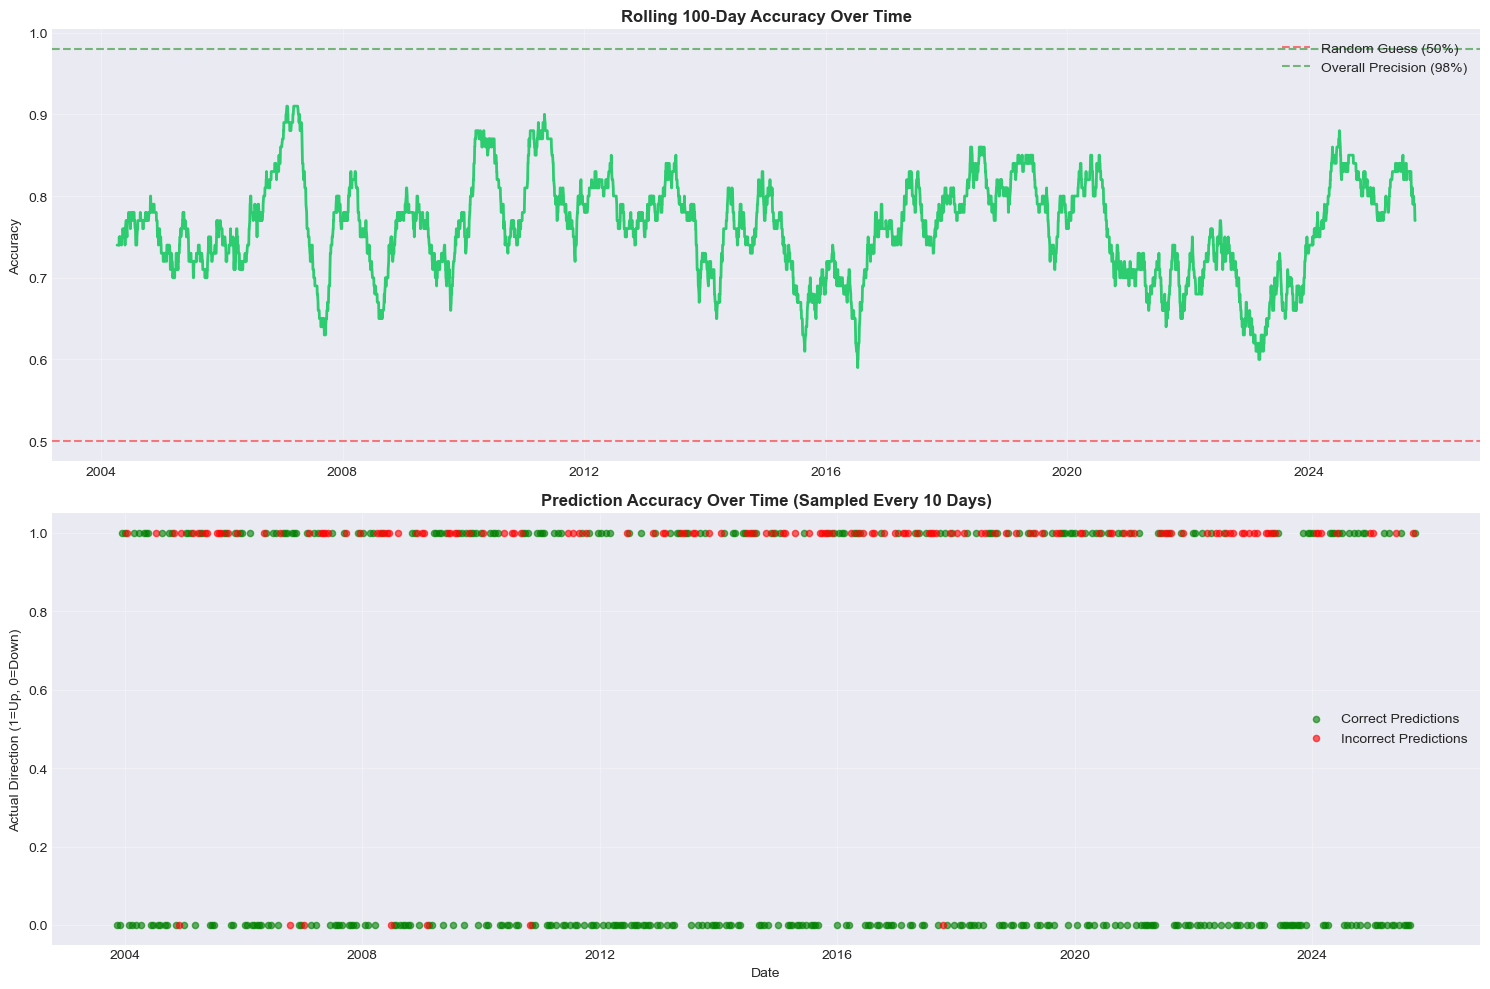

In [43]:
# 1. Better Predictions vs Actual Visualization
fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Top plot: Accuracy over time (rolling window)
window = 100
rolling_accuracy = []
dates = []

for i in range(window, len(predictions)):
    subset = predictions.iloc[i-window:i]
    accuracy = (subset['Target'] == subset['Predictions']).mean()
    rolling_accuracy.append(accuracy)
    dates.append(subset.index[-1])

axes[0].plot(dates, rolling_accuracy, linewidth=2, color='#2ecc71')
axes[0].axhline(y=0.5, color='red', linestyle='--', alpha=0.5, label='Random Guess (50%)')
axes[0].axhline(y=0.98, color='green', linestyle='--', alpha=0.5, label='Overall Precision (98%)')
axes[0].set_title(f'Rolling {window}-Day Accuracy Over Time', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Bottom plot: Correct vs Incorrect predictions as scatter
predictions['Correct'] = (predictions['Target'] == predictions['Predictions'])
correct_mask = predictions['Correct'] == True

# Sample every 10th point to reduce clutter
sample_indices = range(0, len(predictions), 10)
sample_predictions = predictions.iloc[sample_indices]
sample_correct = sample_predictions['Correct'] == True

axes[1].scatter(sample_predictions.index[sample_correct], 
               sample_predictions['Target'][sample_correct], 
               color='green', alpha=0.6, s=20, label='Correct Predictions')
axes[1].scatter(sample_predictions.index[~sample_correct], 
               sample_predictions['Target'][~sample_correct], 
               color='red', alpha=0.6, s=20, label='Incorrect Predictions')
axes[1].set_title('Prediction Accuracy Over Time (Sampled Every 10 Days)', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Actual Direction (1=Up, 0=Down)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


C:\Users\T490\AppData\Local\Temp\ipykernel_3444\4228330079.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')


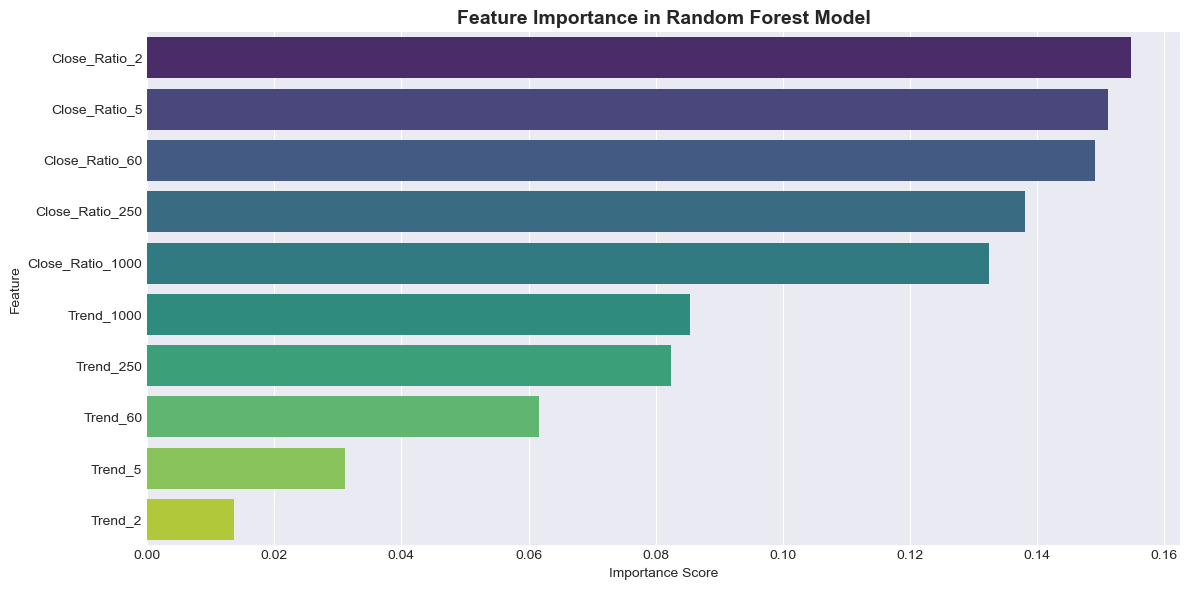

            Feature  Importance
0     Close_Ratio_2    0.154744
2     Close_Ratio_5    0.151141
4    Close_Ratio_60    0.149179
6   Close_Ratio_250    0.138129
8  Close_Ratio_1000    0.132508
9        Trend_1000    0.085441
7         Trend_250    0.082330
5          Trend_60    0.061679
3           Trend_5    0.031190
1           Trend_2    0.013660


In [41]:
# 2. Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': new_predictors,
    'Importance': importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance in Random Forest Model', fontsize=14, fontweight='bold')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

print(feature_importance_df)


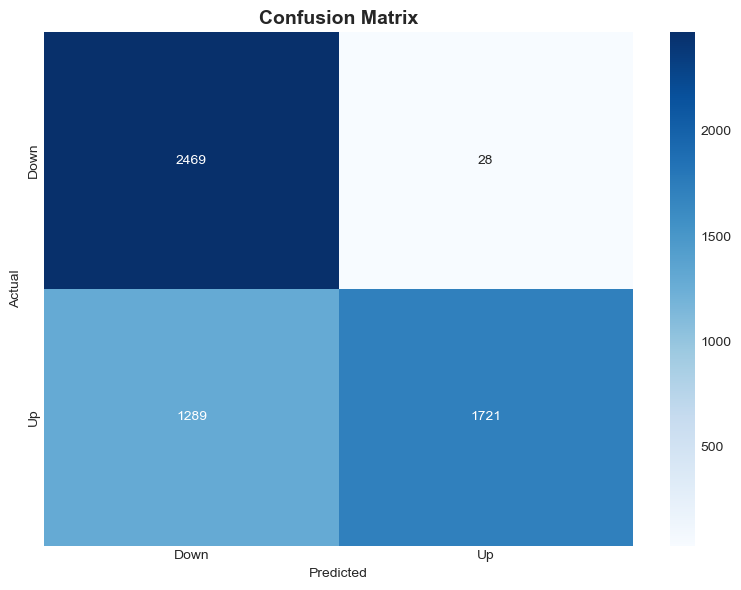


Classification Report:
              precision    recall  f1-score   support

        Down       0.66      0.99      0.79      2497
          Up       0.98      0.57      0.72      3010

    accuracy                           0.76      5507
   macro avg       0.82      0.78      0.76      5507
weighted avg       0.84      0.76      0.75      5507



In [42]:
# 3. Confusion Matrix
cm = confusion_matrix(predictions['Target'], predictions['Predictions'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True, 
            xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(predictions['Target'], predictions['Predictions'], 
                          target_names=['Down', 'Up']))
